Домашнее задание1.
Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?
a.Построить точечный график
b.Рассчитать коэффициенты корреляции Пирсона и Спирмена
c.Построить модель линейной регрессии
d.Рассчитать коэффициент детерминации
e.Вывести график остатков

2.Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?
a.Разделить данные на 2 группы
b.Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('water.csv')
data

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
...,...,...,...,...,...
56,57,South,Walsall,1527,60
57,58,South,West Bromwich,1627,53
58,59,South,West Ham,1486,122
59,60,South,Wolverhampton,1485,81


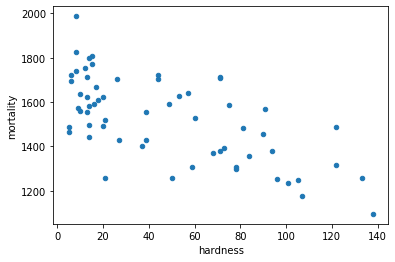

In [3]:
data.plot(kind='scatter', x='hardness', y='mortality')

In [4]:
data[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [5]:
data[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [7]:
X = data[['hardness']]
y = data['mortality']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [9]:
X_train.shape

(48, 1)

In [10]:
y_train.shape

(48,)

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
model.coef_

array([-3.02053961])

In [13]:
model.intercept_

1666.2995507861542

In [14]:
y_pred = model.predict(X_test)
y_pred

array([1382.36882751, 1451.84123853, 1614.95037743, 1642.13523391,
       1249.46508471, 1451.84123853, 1533.39580798, 1488.08771384,
       1554.53958524, 1605.8887586 , 1627.03253587, 1639.1146943 ,
       1548.49850602])

In [15]:
model.score(X_test, y_test)

0.4533811432613624

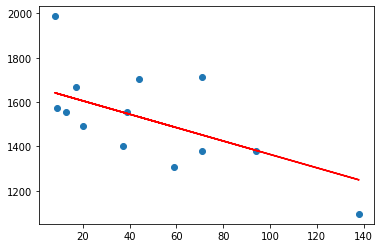

In [16]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

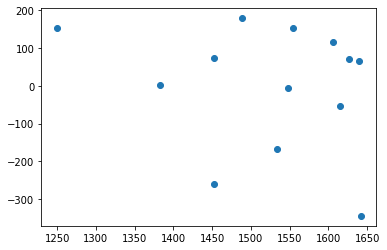

In [17]:
plt.scatter(y_pred, y_pred - y_test)


(array([3., 1., 3., 2., 1., 0., 1., 0., 1., 1.]),
 array([-179.08771384, -126.69246585,  -74.29721785,  -21.90196986,
          30.49327813,   82.88852612,  135.28377412,  187.67902211,
         240.0742701 ,  292.4695181 ,  344.86476609]),
 <a list of 10 Patch objects>)

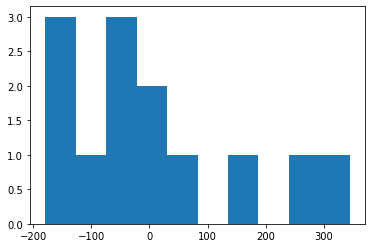

In [19]:
plt.hist(y_test-y_pred)

In [20]:
data_north = data[data.location == 'North']
data_south = data[data.location == 'South']

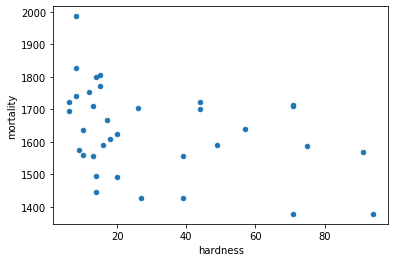

In [21]:
data_north.plot(kind='scatter', x='hardness', y='mortality')

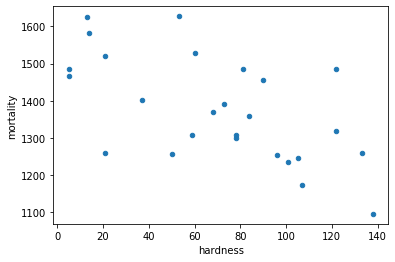

In [22]:
data_south.plot(kind='scatter', x='hardness', y='mortality')

In [23]:
data_north[['mortality', 'hardness']].corr()


,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [24]:
data_south[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [25]:
data_north[['mortality', 'hardness']].corr(method = 'spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


In [26]:
data_south[['mortality', 'hardness']].corr(method = 'spearman')

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


In [32]:
X = data_north[['hardness']]
y = data_north['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
model = LinearRegression()
model.fit(X_train, y_train) 
y_pred = model.predict(X_test)
model.score(X_test, y_test)

-0.032598742560492555

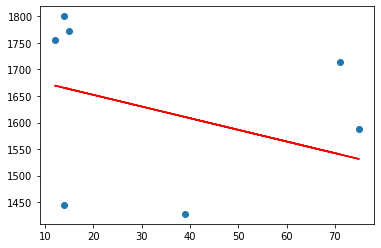

In [33]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

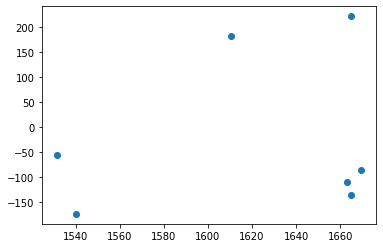

In [36]:
plt.scatter(y_pred, y_pred - y_test)

(array([2., 0., 0., 0., 0., 0., 0., 2., 1., 2.]),
 array([-221.17103953, -181.76548882, -142.3599381 , -102.95438738,
         -63.54883667,  -24.14328595,   15.26226477,   54.66781548,
          94.0733662 ,  133.47891692,  172.88446764]),
 <a list of 10 Patch objects>)

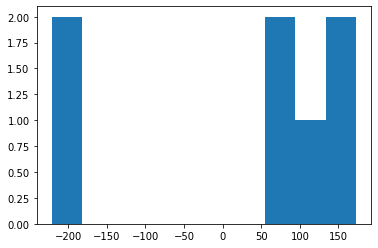

In [37]:
plt.hist(y_test-y_pred)

In [38]:
X = data_south[['hardness']]
y = data_south['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
model = LinearRegression()
model.fit(X_train, y_train) 
y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.18698729163514793

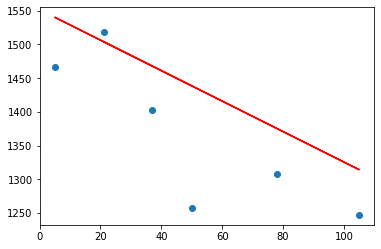

In [39]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

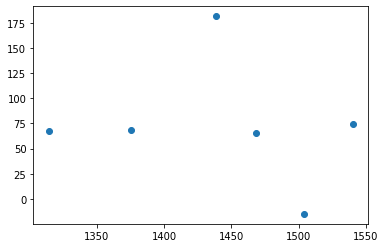

In [40]:
plt.scatter(y_pred, y_pred - y_test)

(array([1., 0., 0., 0., 0., 4., 0., 0., 0., 1.]),
 array([-181.55147947, -161.91303509, -142.2745907 , -122.63614632,
        -102.99770194,  -83.35925755,  -63.72081317,  -44.08236879,
         -24.4439244 ,   -4.80548002,   14.83296436]),
 <a list of 10 Patch objects>)

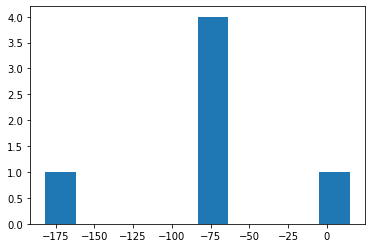

In [41]:
plt.hist(y_test-y_pred)

При анализе всего датасета мы получили коэффициент корреляции - 0.65, что говорит нам о наличии некоторой обратной взимосвязи между жесткостью воды и смертностью. При разделении данных на север и юг, для северных шататов этот показатель снизился до -0.30, те взаимосвязь слабая и жесткость воды на смертность слабо влияет, но для южных штатов коэффиуиент корреляции остался практически на том же уровне -0.60. Недавно читала статью, что жесткая вода снижает риск сердечно сосудистых заболеваний, так что вполне позможно, что наши коэффициенты похожи на правду и чем жестче вода, тем ниже смертность.